**Problem Statement**:
Predict if the client will subscribe to a term deposit

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip3 install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 10.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 13.3 MB/s eta 0:00:00


Data **Collection**

In [ ]:
df = pd.read_csv(r"bank-additional-full.csv", sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Since we do not have any null values in our dataset we dont require to drop any rows or do any preprocessing in that direction

In [ ]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

# Given input variables are as follows

1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)

# Predict variable (desired target)

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)


In [ ]:
df['education'].unique() # reducing the number of categories in education by making all basic education a single type

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [ ]:
df['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['y'])

# printing label
label

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
df.drop("y", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'y'
df["y"] = label

# printing Dataframe
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [ ]:
no_subs = 36548/(36548+4640)
yes_subs = 4640/(36548+4640)
no_subs = no_subs*100
yes_subs = yes_subs*100
no_subs = round(no_subs, 2)
yes_subs = round(yes_subs, 2)
print(no_subs) # calculating the percentage of no subscription
print(yes_subs) # calculating the percentage of yes subscription

88.73
11.27


Therefore the classes are imbalanced and they should be balanced for a better model

# Data exploration

In [ ]:
df.groupby('y').mean()

TypeError: agg function failed [how->mean,dtype->object]

1. 'age' of the ones who didnt buy deposit is lower than the ones who bought
2. per the definition of 'pdays' it makes sense that pdays is lower for the ones who bought the deposit as lower the number of pdays means that the call was done recently to the customer and has a better chance of leading to the customer buying the term deposit
3. Oddly the number of calls made during the current campaign are lower for the ones who bought it.

In [ ]:
df.groupby('job').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [ ]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


# Visualization

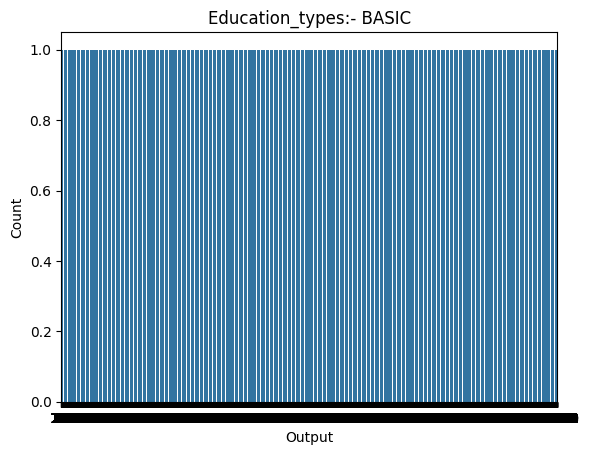

The success rate for the education type Basic is 8.702948933109568%


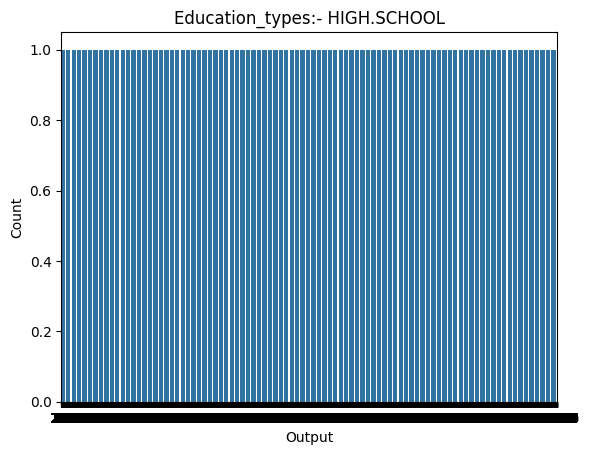

The success rate for the education type high.school is 10.835522858644246%


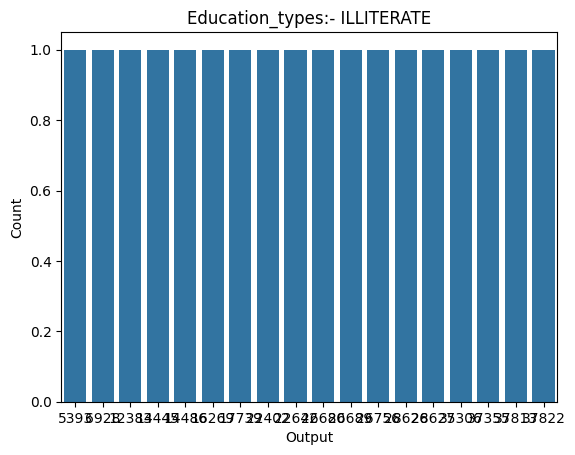

The success rate for the education type illiterate is 22.22222222222222%


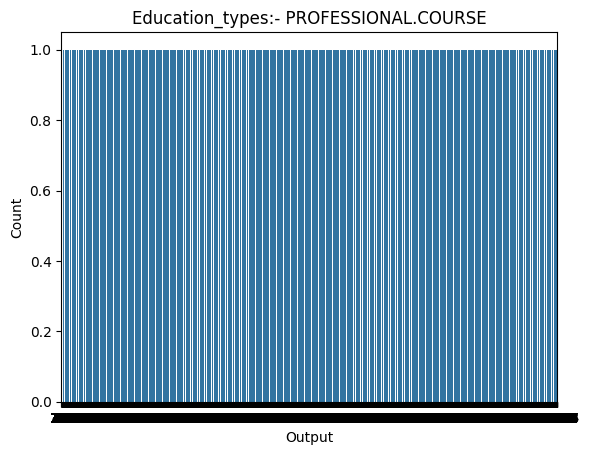

The success rate for the education type professional.course is 11.348464619492656%


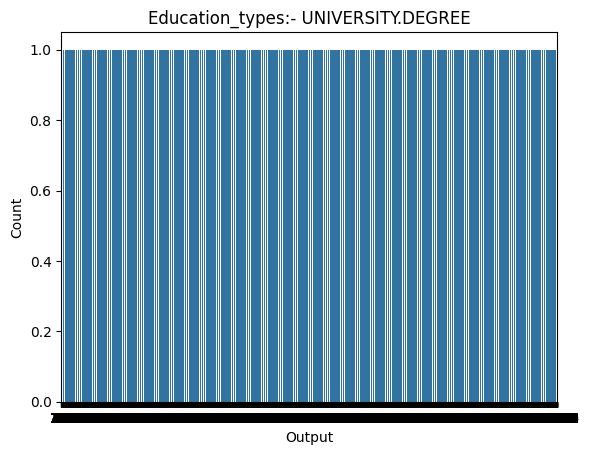

The success rate for the education type university.degree is 13.724523339907954%


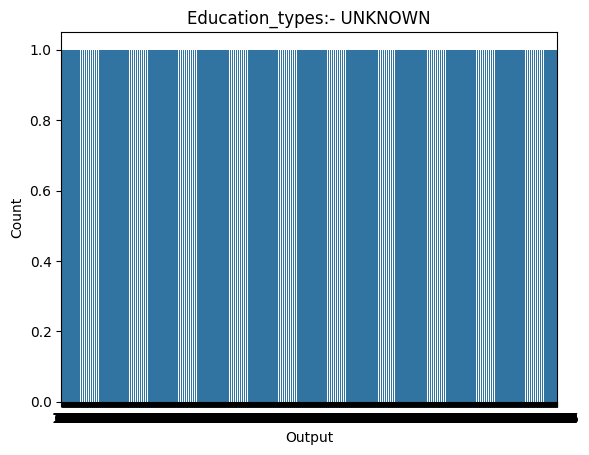

The success rate for the education type unknown is 14.500288850375506%


In [ ]:
# Exploratory data analysis on education type
education_types=np.unique(df["education"])
for i in range(len(education_types)):
    temp=df[df["education"]==education_types[i]]["y"]
    nos=len([i for i in temp if i==0])
    yess=len(temp)-nos
    success_rate=yess/len(temp)
    sns.countplot(temp)
    plt.title(f"Education_types:- {education_types[i].upper()}")
    plt.xlabel("Output")
    plt.ylabel("Count")
    plt.show()
    print(f"The success rate for the education type {education_types[i]} is {success_rate*100}%")

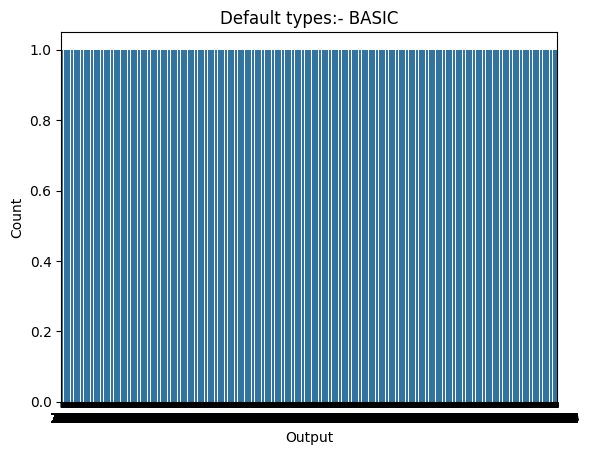

The success rate for the Default type no is 12.878973855406898%


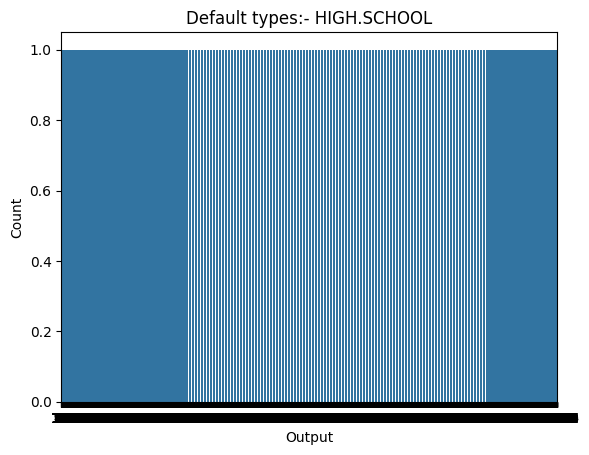

The success rate for the Default type unknown is 5.152960335000581%


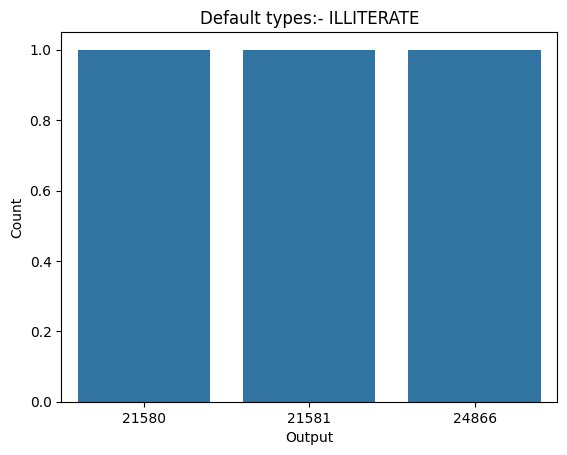

The success rate for the Default type yes is 0.0%


In [ ]:
# Exploratory data analysis on default type

default_types=np.unique(df["default"])
for i in range(len(default_types)):
    temp=df[df["default"]==default_types[i]]["y"]
    nos=len([i for i in temp if i==0])
    yess=len(temp)-nos
    success_rate=yess/len(temp)
    sns.countplot(temp)
    plt.title(f"Default types:- {education_types[i].upper()}")
    plt.xlabel("Output")
    plt.ylabel("Count")
    plt.show()
    print(f"The success rate for the Default type {default_types[i]} is {success_rate*100}%")

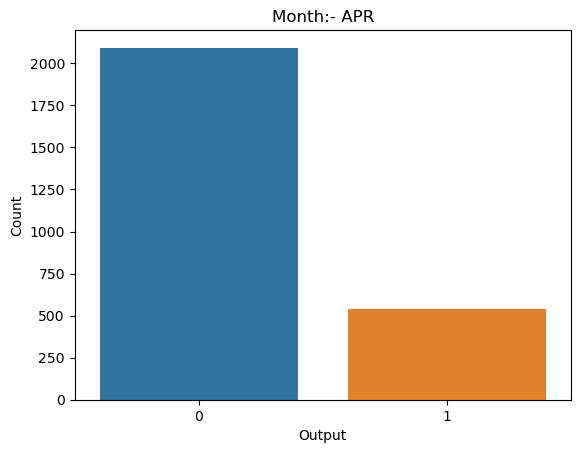

The success rate for the month apr is 20.47872340425532%


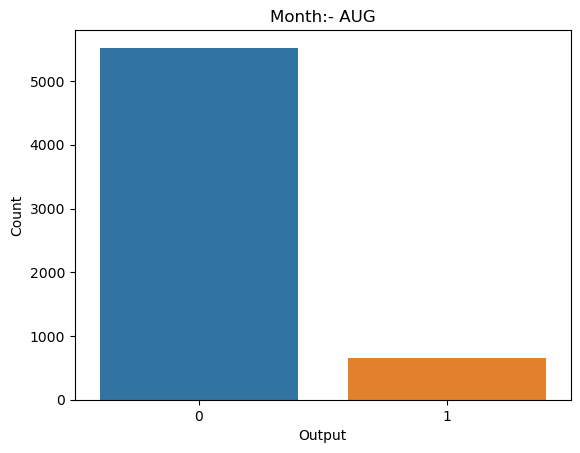

The success rate for the month aug is 10.60213661379087%


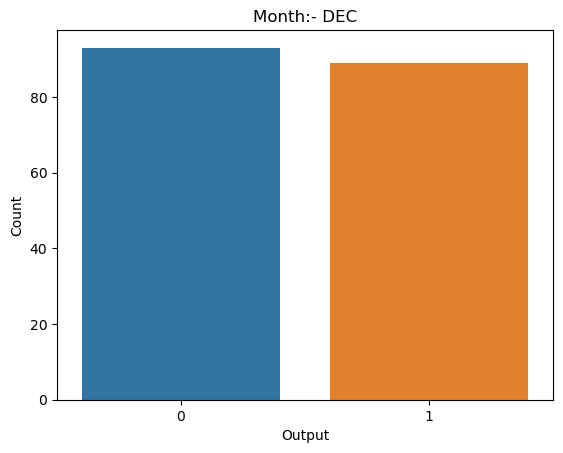

The success rate for the month dec is 48.9010989010989%


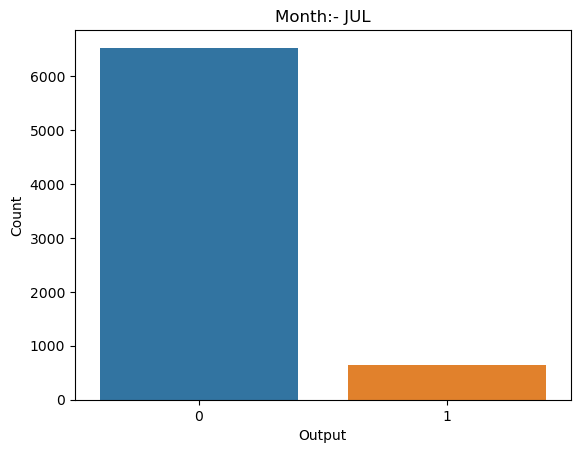

The success rate for the month jul is 9.046557011430165%


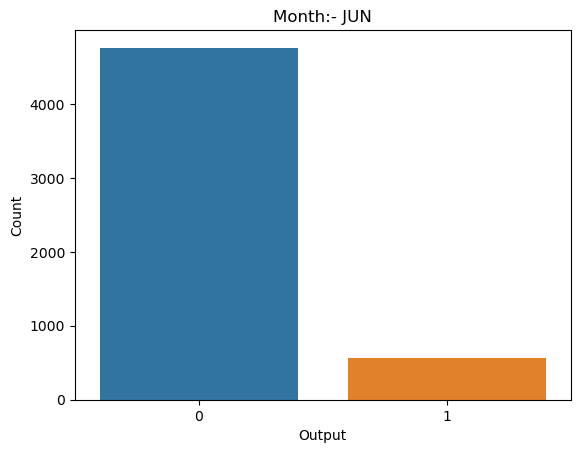

The success rate for the month jun is 10.511470477623167%


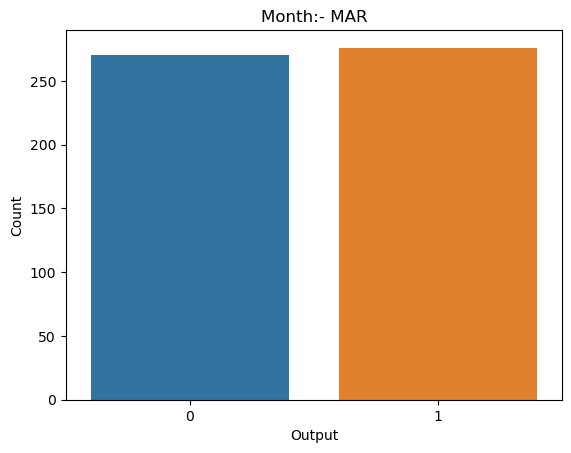

The success rate for the month mar is 50.54945054945055%


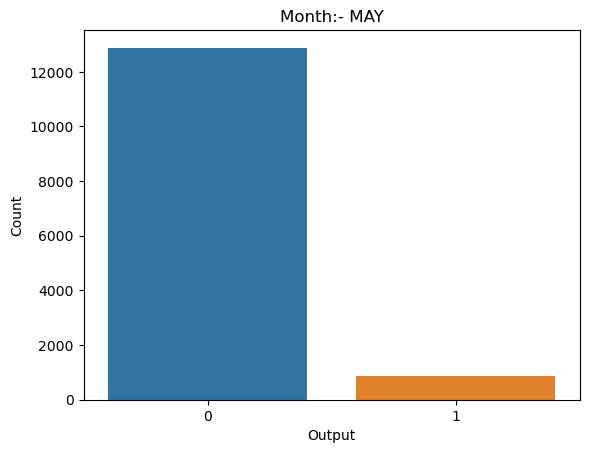

The success rate for the month may is 6.434744716391895%


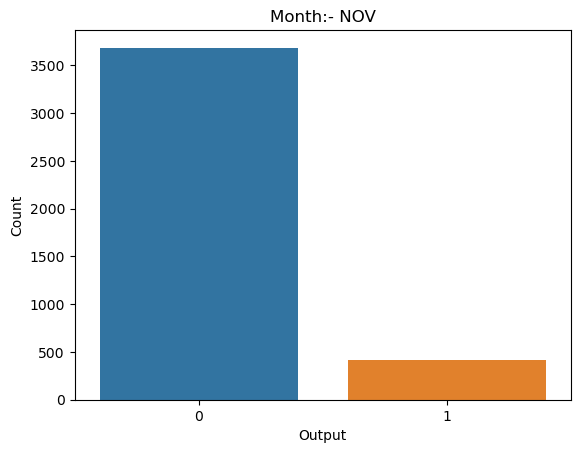

The success rate for the month nov is 10.14386734942697%


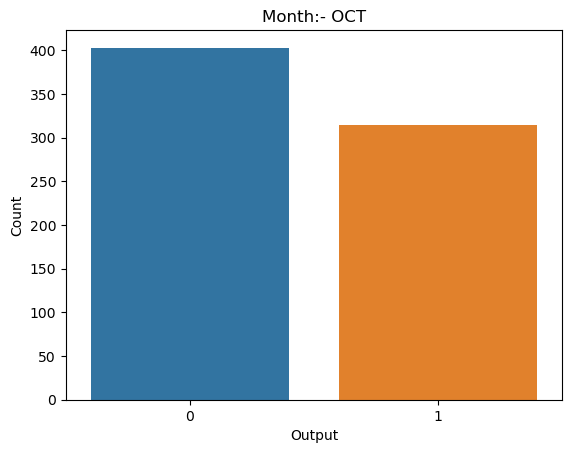

The success rate for the month oct is 43.871866295264624%


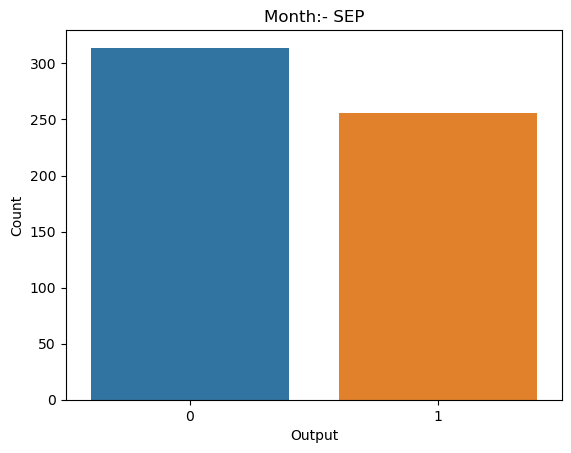

The success rate for the month sep is 44.91228070175438%


In [ ]:
# Exploratory data analysis on months

month_types=sorted(np.unique(df["month"]))
for i in range(len(month_types)):
    temp=df[df["month"]==month_types[i]]["y"]
    nos=len([i for i in temp if i==0])
    yess=len(temp)-nos
    success_rate=yess/len(temp)
    sns.countplot(temp)
    plt.title(f"Month:- {month_types[i].upper()}")
    plt.xlabel("Output")
    plt.ylabel("Count")
    plt.show()
    print(f"The success rate for the month {month_types[i]} is {success_rate*100}%")

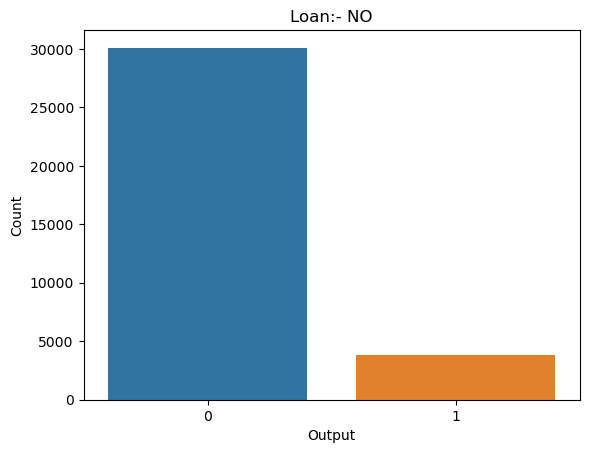

The success rate for loan type no is 11.34020618556701%


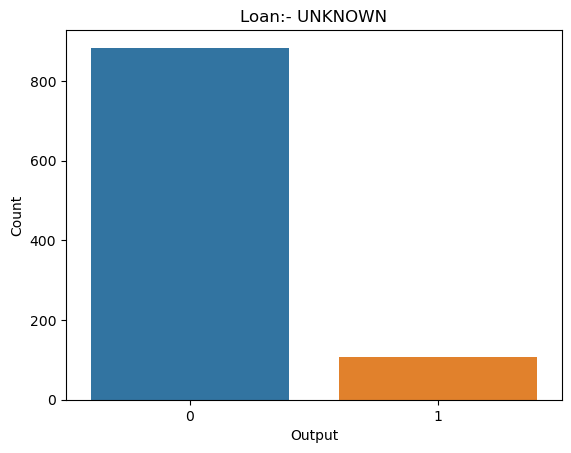

The success rate for loan type unknown is 10.808080808080808%


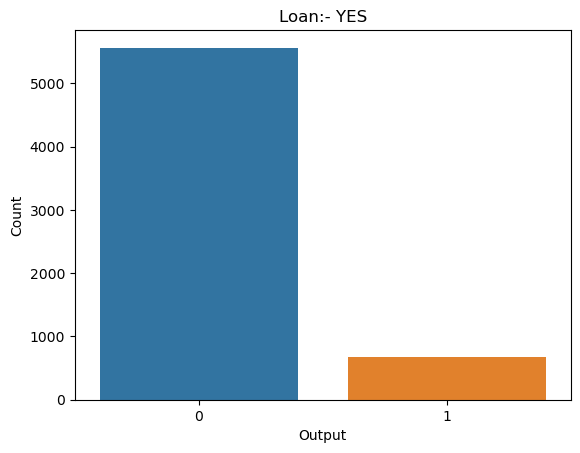

The success rate for loan type yes is 10.931498079385403%


In [ ]:
# Exploratory data analysis on loan type

loan_types=sorted(np.unique(df["loan"]))
for i in range(len(loan_types)):
    temp=df[df["loan"]==loan_types[i]]["y"]
    nos=len([i for i in temp if i==0])
    yess=len(temp)-nos
    success_rate=yess/len(temp)
    sns.countplot(temp)
    plt.title(f"Loan:- {loan_types[i].upper()}")
    plt.xlabel("Output")
    plt.ylabel("Count")
    plt.show()
    print(f"The success rate for loan type {loan_types[i]} is {success_rate*100}%")

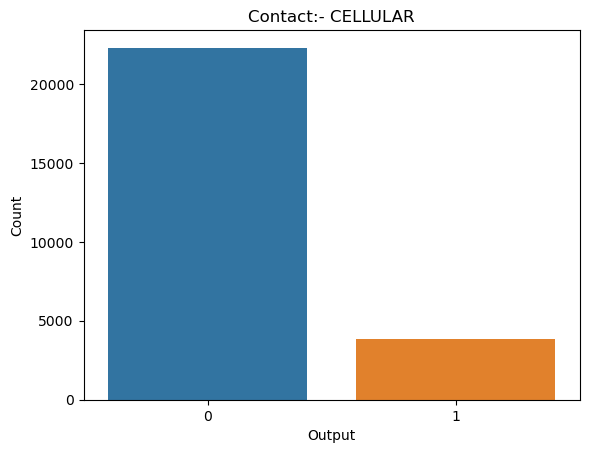

The success rate for contact type cellular is 14.737607099143208%


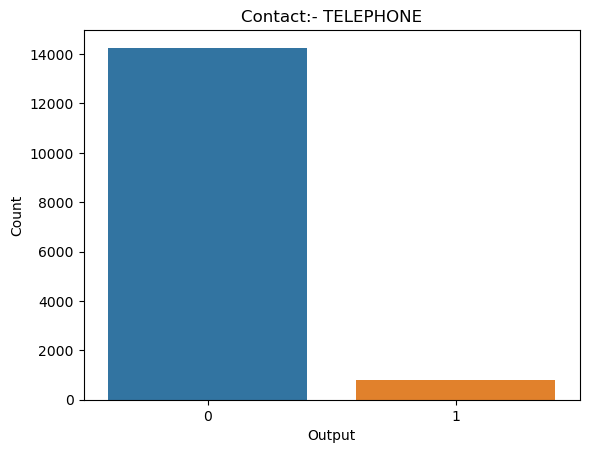

The success rate for contact type telephone is 5.231321457059293%


In [ ]:
# Exploratory data analysis on contact type

contact_types=sorted(np.unique(df["contact"]))
for i in range(len(contact_types)):
    temp=df[df["contact"]==contact_types[i]]["y"]
    nos=len([i for i in temp if i==0])
    yess=len(temp)-nos
    success_rate=yess/len(temp)
    sns.countplot(temp)
    plt.title(f"Contact:- {contact_types[i].upper()}")
    plt.xlabel("Output")
    plt.ylabel("Count")
    plt.show()
    print(f"The success rate for contact type {contact_types[i]} is {success_rate*100}%")

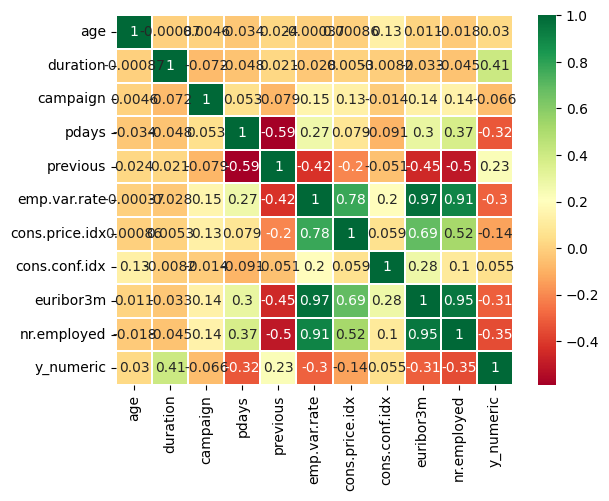

In [ ]:
# Correlation Matrix for the features

new_y=[]
for i in df["y"]:
    if(i==0):
        new_y.append(0)
    else:
        new_y.append(1)

all_features=list(df.columns)[:-1]
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
num_vars = [i for i in all_features if i not in cat_vars]
df["y_numeric"]=new_y
corr_df=df[num_vars+["y_numeric"]]
corr=corr_df.corr()
sns.heatmap(corr,cmap='RdYlGn',linewidths=0.2,annot=True)
plt.show()

<Axes: xlabel='job'>

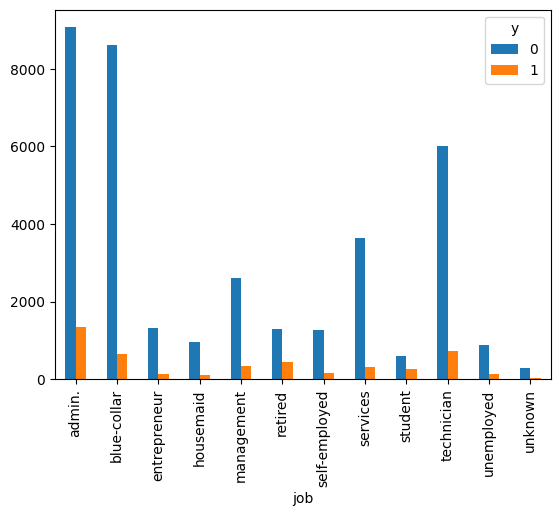

In [ ]:
pd.crosstab(df['job'],df['y']).plot(kind='bar')

We can see that purchase frequency of the deposit greatly depends on the job title

<Axes: xlabel='marital'>

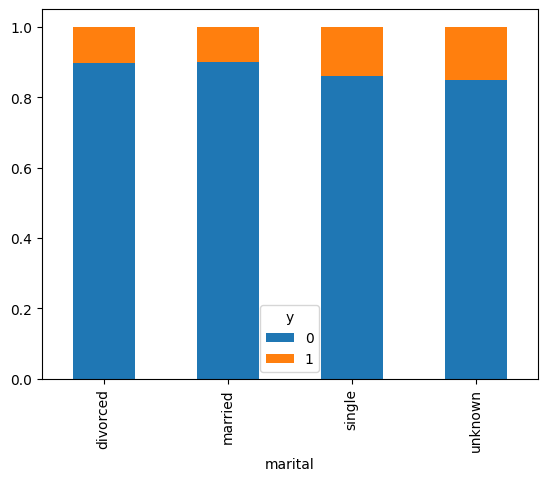

In [ ]:
temp=pd.crosstab(df['marital'],df['y']) # creates a contingency table between 2 categorical variables marital and y
# temp will contain the frequency of each combination of values of these 2 variables
temp.div(temp.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) # normalising the table temp by dividing each row (axis=0) by the sum of values in that row.

We can thus see that 'marital' wont be of much use while predicting the output variable.

<Axes: xlabel='education'>

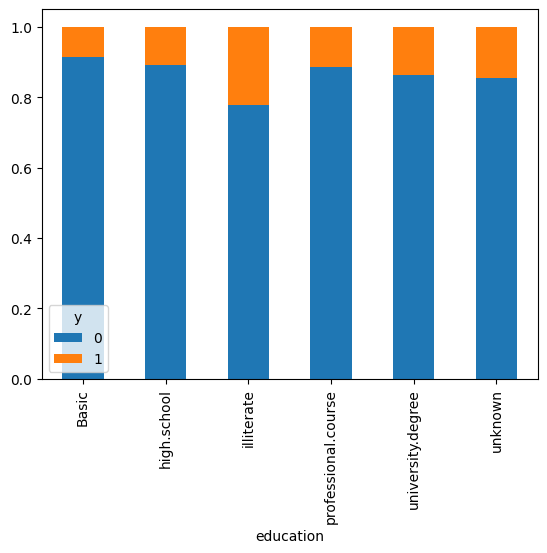

In [ ]:
temp=pd.crosstab(df['education'],df['y'])
temp.div(temp.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Thus 'education' will be a good predictor of the outcome variable

<Axes: xlabel='day_of_week'>

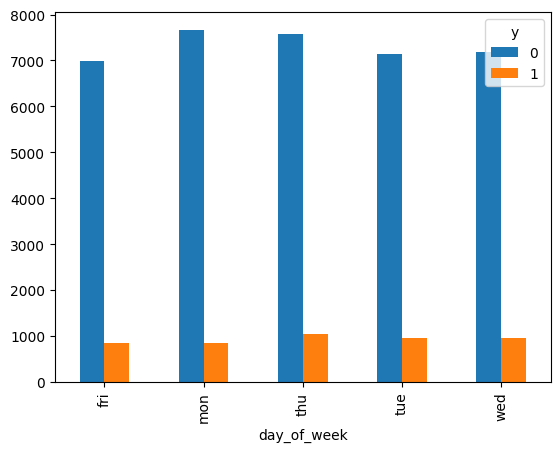

In [ ]:
pd.crosstab(df['day_of_week'],df['y']).plot(kind='bar')

'day_of_week' wont be good for predicting

<Axes: xlabel='month'>

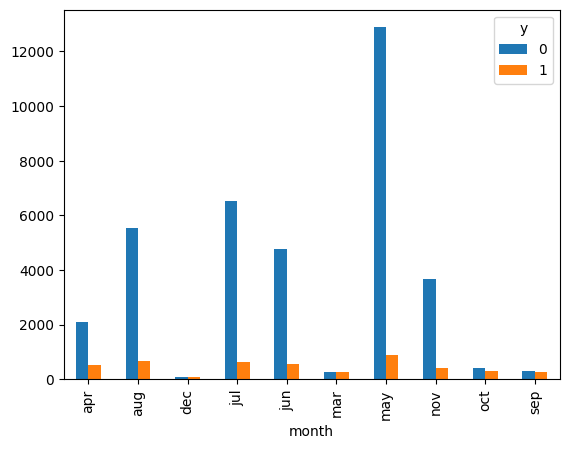

In [ ]:
pd.crosstab(df['month'],df['y']).plot(kind='bar')

Month could be a good predictor

<Axes: >

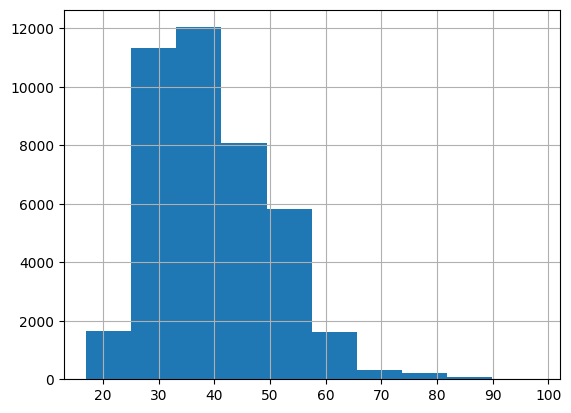

In [ ]:
df['age'].hist()

we see that most of our customers are between the of 30-40

<Axes: xlabel='poutcome'>

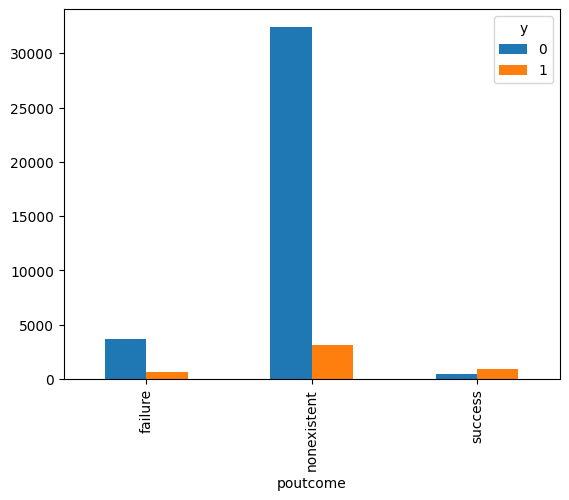

In [ ]:
pd.crosstab(df['poutcome'],df['y']).plot(kind='bar')

In [ ]:
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


In [ ]:
data_final=df[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'y_numeric', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_

In [ ]:
# we will now upsample the no-subscription using SMOTE (Synthetic Minority Oversampling Technique) algorithm
# this algorithm generates synthetic samples for minority class
# it basically increases the number of cases in your dataset in a balanced way

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51158
Number of no subscription in oversampled data 25579
Number of subscription 25579
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
!pip3 install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 884.9 kB/s eta 0:00:00 0:00:01m


Now we have balanced data. We have done upsampling only on training data so that by not doing on test data we dont harm the models accuracy

# Feature Selection
Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# uses logreg as estimator
rfe = RFE(logreg, step=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_) # displays if particular column is chosen or not
print(rfe.ranking_) # displays rank

[False False False False  True False False False  True False  True  True
 False False False  True  True False False  True  True False False  True
  True  True False  True  True False  True  True  True False False False
  True False  True False False  True False False  True False False  True
  True  True  True False  True  True  True  True  True  True  True False
 False False]
[2 3 2 3 1 2 2 2 1 3 1 1 3 3 3 1 1 3 3 1 1 3 3 1 1 1 3 1 1 3 1 1 1 2 3 3 1
 3 1 2 3 1 2 3 1 2 3 1 1 1 1 3 1 1 1 1 1 1 1 2 2 3]


In [ ]:
for i, col in zip(range(len(X)), X):
  print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

age selected=False rank=2
duration selected=False rank=3
campaign selected=False rank=2
pdays selected=False rank=3
previous selected=True rank=1
emp.var.rate selected=False rank=2
cons.price.idx selected=False rank=2
cons.conf.idx selected=False rank=2
euribor3m selected=True rank=1
nr.employed selected=False rank=3
y_numeric selected=True rank=1
job_admin. selected=True rank=1
job_blue-collar selected=False rank=3
job_entrepreneur selected=False rank=3
job_housemaid selected=False rank=3
job_management selected=True rank=1
job_retired selected=True rank=1
job_self-employed selected=False rank=3
job_services selected=False rank=3
job_student selected=True rank=1
job_technician selected=True rank=1
job_unemployed selected=False rank=3
job_unknown selected=False rank=3
marital_divorced selected=True rank=1
marital_married selected=True rank=1
marital_single selected=True rank=1
marital_unknown selected=False rank=3
education_Basic selected=True rank=1
education_high.school selected=True

In [ ]:
cols = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_self-employed', 'job_services', 'job_technician',
         'marital_divorced', 'marital_married', 'marital_single', 'education_Basic', 'education_high.school', 'education_professional.course',
         'education_university.degree', 'education_unknown', 'housing_no', 'housing_yes', 'month_apr', 'month_aug', 'month_jul',
         'month_jun', 'month_may', 'month_nov', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
         'poutcome_failure', 'poutcome_nonexistent']
X=os_data_X[cols]
y=os_data_y['y']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.411567
         Iterations 8
                                Results: Logit
Model:                   Logit                Method:               MLE       
Dependent Variable:      y                    Pseudo R-squared:     0.406     
Date:                    2023-11-27 20:41     AIC:                  42169.8402
No. Observations:        51158                BIC:                  42435.1205
Df Model:                29                   Log-Likelihood:       -21055.   
Df Residuals:            51128                LL-Null:              -35460.   
Converged:               1.0000               LLR p-value:          0.0000    
No. Iterations:          8.0000               Scale:                1.0000    
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [ ]:
!pip3 install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 11.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 9.8 MB/s eta 0:00:00


# Logistic Regression Implementation from Scratch

In [ ]:
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Function for model training
    def fit( self, X, Y ) :
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        # weight initialization
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y

        # gradient descent learning

        for i in range( self.iterations ) :
            self.update_weights()
        return self

    # Helper function to update weights in gradient descent

    def update_weights( self ) :
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )

        # calculate gradients
        tmp = ( A - self.Y.T )
        tmp = np.reshape( tmp, self.m )
        dW = np.dot( self.X.T, tmp ) / self.m
        db = np.sum( tmp ) / self.m

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return self

    # Hypothetical function  h( x )

    def predict( self, X ) :
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )
        Y = np.where( Z > 0.5, 1, 0 )
        return Y

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model1 = LogitRegression( learning_rate = 0.01, iterations = 1000 )

model1.fit( X_train, y_train )
Y_pred1 = model1.predict( X_test )

print(classification_report(y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77      7651
           1       0.75      0.88      0.81      7697

    accuracy                           0.79     15348
   macro avg       0.80      0.79      0.79     15348
weighted avg       0.80      0.79      0.79     15348



In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7599   52]
 [ 981 6716]]


The result is telling us that we have 7519+6831 correct predictions and 866+132 incorrect predictions.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7651
           1       0.99      0.87      0.93      7697

    accuracy                           0.93     15348
   macro avg       0.94      0.93      0.93     15348
weighted avg       0.94      0.93      0.93     15348



# Conclusion
Of the entire test set, 93% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 93% of the customer’s preferred term deposits that were promoted.

# Support Vector Classifier Implementation

In [ ]:
# Making the necessary imports
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Spliting the pre-processed data into train and test data for model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Model Training
svc=SVC(C=100,kernel='rbf',probability=True)
svc.fit(X_train,y_train)

SVC(C=100, probability=True)

In [ ]:
# Testing the trained model on the unseen test data

y_pred = svc.predict(X_test)
print('Accuracy of Support Vector Classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of Support Vector Classifier on test set: 0.93


In [ ]:
# Visualization of the model predictions on the test data using the confusion matrix

confusion_matrix = confusion_matrix(np.array(y_test),y_pred)
print(confusion_matrix)

[[7300  351]
 [ 780 6917]]


The result is telling us that we have 7300+6817 correct predictions and 351+780 incorrect predictions on the test data using SVC.

In [ ]:
# Classification report on SVC performance on test data

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      7651
           1       0.95      0.90      0.92      7697

    accuracy                           0.93     15348
   macro avg       0.93      0.93      0.93     15348
weighted avg       0.93      0.93      0.93     15348



# Conclusion for SVC
For the support vector classifier model out of the complete test set, 93% of the term deposits promoted were the ones preferred by the customers. Similarly, within the entire test set, 93% of the term deposits that customers favored were promoted.

# Preprocessing for KNN and Decision Tree

### Reading the Bank Marketing Data from the csv file

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0


### Getting the info about the column data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   job                            41188 non-null  object 
 2   marital                        41188 non-null  object 
 3   education                      41188 non-null  object 
 4   default                        41188 non-null  object 
 5   housing                        41188 non-null  object 
 6   loan                           41188 non-null  object 
 7   contact                        41188 non-null  object 
 8   month                          41188 non-null  object 
 9   day_of_week                    41188 non-null  object 
 10  duration                       41188 non-null  int64  
 11  campaign                       41188 non-null  int64  
 12  pdays                          41188 non-null 

### Getting the unique values present in the columns 'default', 'housing' & 'loan'

In [ ]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [ ]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

### Converting categorical data of the above columns to the numerical using label encoding as below
'no': -1
'yes': 1
'unknown': 0

In [ ]:
def to_numeric(val):
    if val == 'no':
        return -1
    elif val == 'yes':
        return 1
    elif val == 'unknown':
        return 0
df['default'] = df['default'].apply(lambda x: to_numeric(x))
df['housing'] = df['housing'].apply(lambda x: to_numeric(x))
df['loan'] = df['loan'].apply(lambda x: to_numeric(x))

### Filling in the missing values in the education column with the most frequent value based on the job

In [ ]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
#Getting the list of job categories which have 'unknown' value in education column
job_categories = list(df[df['education'] == 'unknown']['job'].unique())

In [ ]:
#Filling the missing values('unknown') in education column with most frequent value based on the job role
for job in job_categories:
    edu = df[(df['education'] != 'unknown') & (df['job'] == job)]['education'].mode()[0]
    #df[(df['education'] == 'unknown') & (df['job'] == job)]['education'] = edu
    df.loc[(df['education'] == 'unknown') & (df['job'] == job), 'education'] = edu
    print(job,"--",edu)

blue-collar -- basic.9y
technician -- professional.course
admin. -- university.degree
unknown -- basic.4y
management -- university.degree
services -- high.school
entrepreneur -- university.degree
retired -- basic.4y
student -- high.school
self-employed -- university.degree
housemaid -- basic.4y
unemployed -- university.degree


In [ ]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

### Converting categorical data of the education column to the numerical using label encoding as below
'illiterate': 0
'basic.4y': 4
'basic.6y': 6
'basic.9y': 9
'high.school': 12
'professional.course': 14
'university.degree: 16

In [ ]:
def edu_to_numeric(edu):
    if 'basic' in edu:
        return int(edu.split('.')[-1][:-1])
    elif edu == 'illiterate':
        return 0
    elif edu == 'high.school':
        return 12
    elif edu == 'professional.course':
        return 14
    elif edu == 'university.degree':
        return 16
df['education'] = df['education'].apply(lambda x: edu_to_numeric(x))

In [ ]:
df['education'].unique()

array([ 4, 12,  6,  9, 14, 16,  0])

### Converting categorical data of the 'month' and 'day of the week' column to the numerical using Cyclical Transform as below

In [ ]:
dct_months = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
dct_days = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}

df['month'] = df['month'].apply(lambda x: dct_months[x])
df['month_sin'] = np.sin(df['month'] * (2 * np.pi / 12))
df['month_cos'] = np.cos(df['month'] * (2 * np.pi / 12))

df['day_of_week'] = df['day_of_week'].apply(lambda x: dct_days[x])
df['day_of_week_sin'] = np.sin(df['day_of_week'] * (2 * np.pi / 7))
df['day_of_week_cos'] = np.cos(df['day_of_week'] * (2 * np.pi / 7))

df.drop(['month', 'day_of_week'], axis = 1, inplace = True)

### Converting categorical data of the 'contact', 'pout' and 'y' column to the numerical using label encoding as below

In [ ]:
dct_pout = {'failure': -1, 'nonexistent': 0, 'success': 1}
def contact_info_to_numeric(val):
    if val == 'telephone':
        return 0
    else:
        return 1
df['poutcome'] = df['poutcome'].apply(lambda x: dct_pout[x])
df['contact'] = df['contact'].apply(lambda x: contact_info_to_numeric(x))
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,56,housemaid,married,4,-1,-1,-1,0,261,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.781831,0.623490
1,57,services,married,12,0,-1,-1,0,149,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.781831,0.623490
2,37,services,married,12,-1,1,-1,0,226,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.781831,0.623490
3,40,admin.,married,6,-1,-1,-1,0,151,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.781831,0.623490
4,56,services,married,12,-1,-1,1,0,307,1,...,1.1,93.994,-36.4,4.857,5191.0,0,0.5,-0.866025,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,14,-1,1,-1,1,334,1,...,-1.1,94.767,-50.8,1.028,4963.6,1,-0.5,0.866025,-0.974928,-0.222521
41184,46,blue-collar,married,14,-1,-1,-1,1,383,1,...,-1.1,94.767,-50.8,1.028,4963.6,0,-0.5,0.866025,-0.974928,-0.222521
41185,56,retired,married,16,-1,1,-1,1,189,2,...,-1.1,94.767,-50.8,1.028,4963.6,0,-0.5,0.866025,-0.974928,-0.222521
41186,44,technician,married,14,-1,-1,-1,1,442,1,...,-1.1,94.767,-50.8,1.028,4963.6,1,-0.5,0.866025,-0.974928,-0.222521


### Converting categorical data of the 'job' and 'marital' columns to numerical using one hot encoding as below

In [ ]:
df = pd.get_dummies(df, columns=['job'], prefix="job")
df.drop(['job_unknown'], axis = 1, inplace = True)
df = pd.get_dummies(df, columns=['marital'], prefix="marital")
df.drop(['marital_unknown'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   education          41188 non-null  int64  
 2   default            41188 non-null  int64  
 3   housing            41188 non-null  int64  
 4   loan               41188 non-null  int64  
 5   contact            41188 non-null  int64  
 6   duration           41188 non-null  int64  
 7   campaign           41188 non-null  int64  
 8   pdays              41188 non-null  int64  
 9   previous           41188 non-null  int64  
 10  poutcome           41188 non-null  int64  
 11  emp.var.rate       41188 non-null  float64
 12  cons.price.idx     41188 non-null  float64
 13  cons.conf.idx      41188 non-null  float64
 14  euribor3m          41188 non-null  float64
 15  nr.employed        41188 non-null  float64
 16  y                  411

### Seperating the output column from the dataframe

In [ ]:
df_out = df['y']
df.drop(['y'], axis = 1, inplace = True)

### Standardizing all the columns of the dataframe

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in df.columns:
    col_data = np.array(df[col]).reshape(-1, 1)
    scaler.fit(col_data)
    scaled_data = scaler.transform(col_data)
    df[col] = scaled_data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(df,df_out,test_size=0.20)

### KNN

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


def get_metrics_(X_train, X_test, y_train, y_test, k_neighbors_range, weights = ''):
    recall_vals = []
    f1_score_vals = []
    accuracy_vals = []
    for i in k_neighbors_range:
        if weights != '':
            knn = KNeighborsClassifier(n_neighbors=i, weights = weights)
        else:
            knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        recall = recall_score(y_test, pred, pos_label=1)
        recall_vals.append(recall)
        f1 = f1_score(y_test, pred)
        f1_score_vals.append(f1)
        accuracy = accuracy_score(y_test, pred)
        accuracy_vals.append(accuracy)
    return recall_vals, f1_score_vals, accuracy_vals

k_neighbors_range = range(1, 41, 2)
recall_vals, f1_score_vals, accuracy_vals = get_metrics_(X_train, X_test, y_train, y_test, k_neighbors_range)

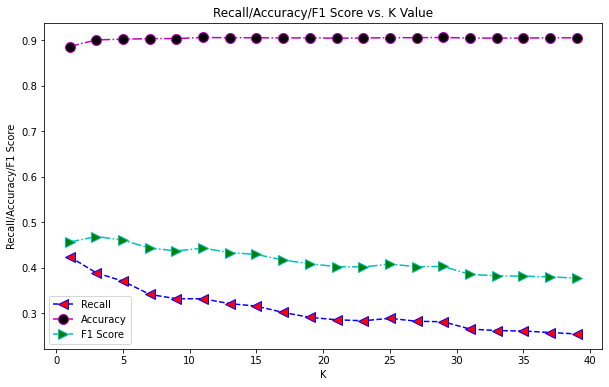

In [ ]:
import matplotlib.pyplot as plt

def plot_graph(hyper_param_range, recall_vals, accuracy_vals, f1_score_vals, model = ''):
    plt.figure(figsize=(10, 6))
    plt.plot(hyper_param_range, recall_vals, color='b',
             linestyle='--', marker='<',
             markerfacecolor='r', markersize=10, label='Recall')
    plt.plot(hyper_param_range, accuracy_vals, color='m',
             linestyle='-.', marker='o',
             markerfacecolor='k', markersize=10, label='Accuracy')
    plt.plot(hyper_param_range, f1_score_vals, color='c',
             linestyle='-.', marker='>',
             markerfacecolor='g', markersize=10, label='F1 Score')
    plt.title('Recall/Accuracy/F1 Score vs. K Value')
    if model == 'knn':
        plt.xlabel('K')
    elif model == 'dtree':
        plt.xlabel('Max Depth')
    plt.ylabel('Recall/Accuracy/F1 Score')
    plt.legend()
    plt.show()

plot_graph(k_neighbors_range, recall_vals, accuracy_vals, f1_score_vals, 'knn')

### Weighted KNN

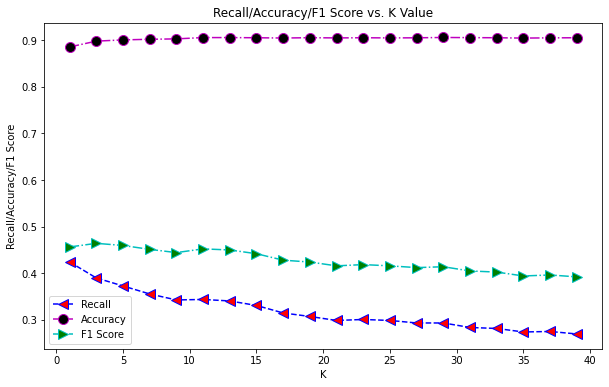

In [ ]:
k_neighbors_range = range(1, 41, 2)
recall_vals, f1_score_vals, accuracy_vals = get_metrics_(X_train, X_test, y_train, y_test, k_neighbors_range, weights = 'distance')
plot_graph(k_neighbors_range, recall_vals, accuracy_vals, f1_score_vals, 'knn')

### KNN with SMOTE

In [ ]:
# Oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

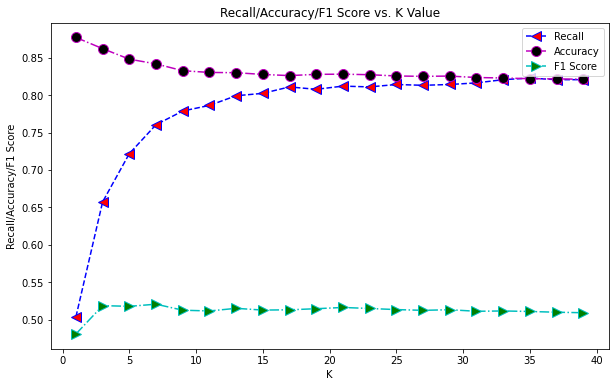

In [ ]:
k_neighbors_range = range(1, 41, 2)
recall_vals, f1_score_vals, accuracy_vals = get_metrics_(X_res, X_test, y_res, y_test, k_neighbors_range)
plot_graph(k_neighbors_range, recall_vals, accuracy_vals, f1_score_vals, 'knn')

### Dimensionality reduction using PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)

X_train_pca = pca.fit_transform(X_res) #Oversampled Data
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance.sum()

0.871790604384836

#### KNN with PCA for a k_neighbors_range of [1,41]

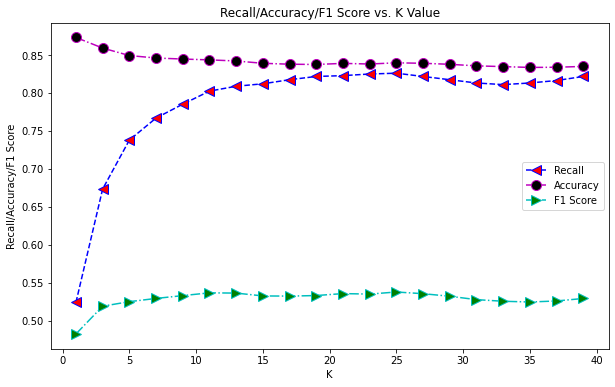

In [ ]:
k_neighbors_range = range(1, 41, 2)
recall_vals, f1_score_vals, accuracy_vals = get_metrics_(X_train_pca, X_test_pca, y_res, y_test, k_neighbors_range)
plot_graph(k_neighbors_range, recall_vals, accuracy_vals, f1_score_vals, 'knn')

### KNN with & without PCA

In [ ]:
#Without PCA for n_neighbors=25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_res, y_res)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      7307
           1       0.37      0.81      0.51       931

    accuracy                           0.83      8238
   macro avg       0.67      0.82      0.70      8238
weighted avg       0.90      0.83      0.85      8238



In [ ]:
#With PCA for n_neighbors=25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_pca, y_res)
pred = knn.predict(X_test_pca)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7307
           1       0.40      0.83      0.54       931

    accuracy                           0.84      8238
   macro avg       0.69      0.83      0.72      8238
weighted avg       0.91      0.84      0.86      8238



 ## Conclusion

KNN algorithm works better with dimensionality reduction(PCA) and at a k(n_neighbors) value of 25. The model gives an accuracy of 84% on the test set and a recall of 83% on the condition that the client subscribes to the term deposit.

### Decision Tree Classification

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

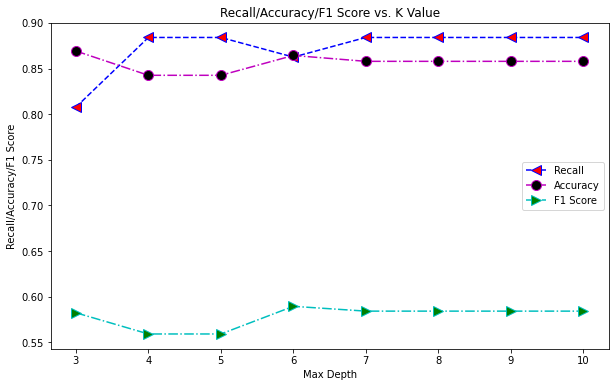

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def get_metrics_dtree(X_train, X_test, y_train, y_test, max_depth_range):
    recall_vals = []
    f1_score_vals = []
    accuracy_vals = []
    for max_depth in max_depth_range:
        model = DecisionTreeClassifier(criterion='entropy', random_state = 12, max_depth=max_depth, class_weight='balanced', min_weight_fraction_leaf=0.01)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        recall = recall_score(y_test, pred, pos_label=1)
        recall_vals.append(recall)
        f1 = f1_score(y_test, pred)
        f1_score_vals.append(f1)
        accuracy = accuracy_score(y_test, pred)
        accuracy_vals.append(accuracy)
    return recall_vals, f1_score_vals, accuracy_vals

depth_range = range(3,11)
recall_vals, f1_score_vals, accuracy_vals = get_metrics_dtree(X_res, X_test, y_res, y_test, depth_range)
plot_graph(depth_range, recall_vals, accuracy_vals, f1_score_vals, 'dtree')

### Decision Tree Classification with & without PCA

In [ ]:
#Without PCA
model = DecisionTreeClassifier(criterion='entropy', random_state = 12, max_depth=7, class_weight='balanced', min_weight_fraction_leaf=0.01)
model.fit(X_res, y_res)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7307
           1       0.44      0.88      0.58       931

    accuracy                           0.86      8238
   macro avg       0.71      0.87      0.75      8238
weighted avg       0.92      0.86      0.88      8238



In [ ]:
#With PCA
model = DecisionTreeClassifier(criterion='entropy', random_state = 12, max_depth=7, class_weight='balanced', min_weight_fraction_leaf=0.01)
model.fit(X_train_pca, y_res)
pred = model.predict(X_test_pca)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7307
           1       0.37      0.88      0.52       931

    accuracy                           0.82      8238
   macro avg       0.68      0.85      0.70      8238
weighted avg       0.91      0.82      0.85      8238



## Conclusion

As shown above decision tree algorithm works better without any dimensionality reduction and a maximum depth of 7. This model gives an accuracy of 86% on the test set and a recall of 88% on the condition that the client subscribes to the term deposit.